
# Лаборатоная работа №2

## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

##### Выполнил: Борисочкин М. И., РТ5-61Б


### Импорт библиотек


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="ticks")


### Загрузка и первичный анализ данных

В данной лабораторной работе будем использовать набор данных рынка жилья в Мельбурне с ресурса kaggle ([Melbourne Housing Market](https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv))

In [2]:
# Загрузка датасета с большим числом столбцов
data = pd.read_csv('data/Melbourne_housing_FULL.csv', sep=',')

In [3]:
# Размер набора данных
data.shape

(34857, 21)

In [4]:
# Типы столбцов
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
# Проверка наличия пустых значений
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
# Всего строк и столбцов
total_rows, total_columns = data.shape[0], data.shape[1]
print('Всего строк: {} \nВсего столбцов: {}'.format(total_rows, total_columns))

Всего строк: 34857 
Всего столбцов: 21



### Обработка пропусков в данных

#### Удаление строк и столбцов

Удалим строки с пустыми значениями в следующих атрибутах: Distance, Postcode, CouncilArea, Regionname, Propertycount, так как таких строк очень мало относительно всего набора данных.
Также удалим столбцы Landsize, BuildingArea и YearBuilt из-за огромного числа пропусков (Landsize > 30%, BuildingArea и YearBuilt > 50%). Заодно переименуем столбец Bedroom2 в просто Bedroom.

In [8]:
# Удаление строк
data_with_deleted_rows = data.dropna(subset=['Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount'])

# Удаление столбцов
data_with_deleted : pd.DataFrame = data_with_deleted_rows.drop(columns=['Landsize','BuildingArea', 'YearBuilt'])

# Переименование столбца Bedroom2
data_with_deleted = data_with_deleted.rename(columns={'Bedroom2': 'Bedroom'})

# Проверка пустых значений
data_with_deleted.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom          8214
Bathroom         8223
Car              8725
CouncilArea         0
Lattitude        7973
Longtitude       7973
Regionname          0
Propertycount       0
dtype: int64


#### Заполнение пропусков

In [9]:
# Числовые колонки с пропущенными значениями
num_cols = []
for column in data_with_deleted.columns:
    temp_null_count = data_with_deleted[data_with_deleted[column].isnull()].shape[0]
    dt = str(data_with_deleted[column].dtype)

    if temp_null_count > 0 and (dt == 'float64' or dt == 'int64'):
        num_cols.append(column)
        temp_percent = round((temp_null_count/ data_with_deleted.shape[0]) * 100.0, 2)
        print('Столбец: {}. Тип данных: {}. Кол-во пустых значений: {}, {}%'.format(column, dt, temp_null_count, temp_percent))

Столбец: Price. Тип данных: float64. Кол-во пустых значений: 7610, 21.83%
Столбец: Bedroom. Тип данных: float64. Кол-во пустых значений: 8214, 23.57%
Столбец: Bathroom. Тип данных: float64. Кол-во пустых значений: 8223, 23.59%
Столбец: Car. Тип данных: float64. Кол-во пустых значений: 8725, 25.03%
Столбец: Lattitude. Тип данных: float64. Кол-во пустых значений: 7973, 22.88%
Столбец: Longtitude. Тип данных: float64. Кол-во пустых значений: 7973, 22.88%


Построим гистограммы для данных признаков:

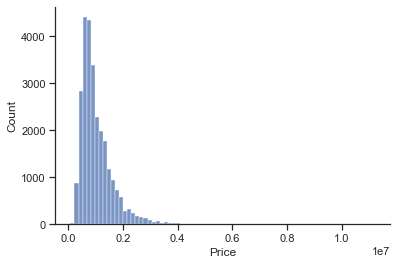

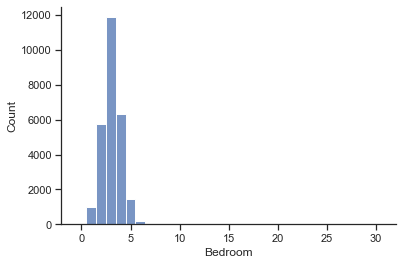

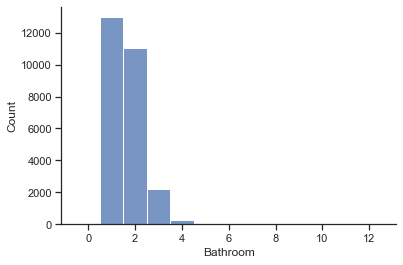

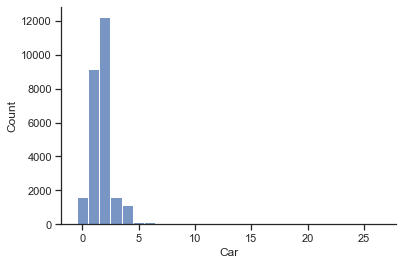

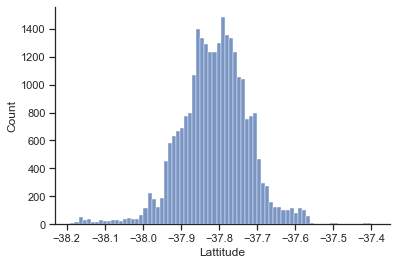

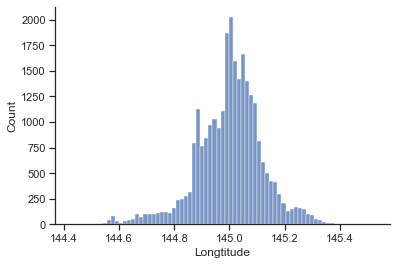

In [10]:
data_num = data_with_deleted[num_cols]

# Гистограмма по признакам
for column in data_num:
    if column == 'Bedroom' or column == 'Bathroom' or column == 'Car':
        sns.histplot(data_with_deleted[column], discrete=True)
    else:
        sns.histplot(data_with_deleted[column], bins=75)
    sns.despine()
    plt.show()

Импортируем средства импьютации из библиотеки scikit-learn:

In [11]:
from sklearn.impute import MissingIndicator, SimpleImputer

In [12]:
# Фильтр для проверки заполнения пустых значений
miss_indicator = MissingIndicator()
mask_only_missing_values = miss_indicator.fit_transform(data_with_deleted[['Price']])
mask_only_missing_values

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [13]:
def impute_dataframe(df, col, strategy_name) -> pd.DataFrame:
    """
    Функия для заполнения пропусков в столбце датафрейма

    :param df: Датафрейм
    :param col: Столбец, в которой надо заполнить пропуски
    :param strategy_name: Стратегия импьютации
    :return: Датафрейм с заполнненой колонкой
    """
    imp = SimpleImputer(strategy=strategy_name)

    data_imputed = imp.fit_transform(df[[col]])
    df[[col]] = data_imputed

    return df

Заполним пропуски в стобцах Price, Lattitude, Longtitude модой, а пропуски в стобцах Bedroom, Bathroom и Cars — медианой:

In [14]:
# Заполнение модой
data_completed = impute_dataframe(data_with_deleted, 'Price', 'most_frequent')
data_completed = impute_dataframe(data_completed, 'Lattitude', 'most_frequent')
data_completed = impute_dataframe(data_completed, 'Longtitude', 'most_frequent')

# Заполнение медианой
data_completed = impute_dataframe(data_completed, 'Bedroom', 'median')
data_completed = impute_dataframe(data_completed, 'Bathroom', 'median')
data_completed = impute_dataframe(data_completed, 'Car', 'median')

data_completed.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Как было видно из анализа данных, столбцы Bedroom, Bathroom и Car имеют тип float64, хотя должны иметь тип int64, так отвечают за количество комнат/автомобилей. Аналогичная ситуация со столбцами Postcode и Propertycount. Также приведём поле Date к соответствующему виду:

In [15]:
data_completed = data_completed.astype({'Bedroom' : 'int64', 'Bathroom' : 'int64', 'Car' : 'int64', 'Postcode' : 'int64', 'Propertycount' : 'int64'})
data_completed['Date'] = pd.to_datetime(data_completed['Date'], dayfirst=True)
data_completed.head(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000.0,SS,Jellis,2016-09-03,2.5,3067,2,1,1,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,1,1,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,1,0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,600000.0,VB,Rounds,2016-02-04,2.5,3067,3,2,1,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,2,0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,3,2,1,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3,1,2,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,600000.0,SN,Nelson,2016-08-06,2.5,3067,3,2,2,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
8,Abbotsford,53 Turner St,2,h,600000.0,S,Biggin,2016-08-06,2.5,3067,4,1,2,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019
9,Abbotsford,99 Turner St,2,h,600000.0,S,Collins,2016-08-06,2.5,3067,3,2,1,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019



### Кодирование категориальных признаков

Импортируем необходимые инструменты:

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Закодируем признак Method целочисленными значениями (label encoding):

In [17]:
lbl_enc = LabelEncoder()
method_lbl_encoded = lbl_enc.fit_transform(data_completed['Method'])

In [18]:
# Уникальные значения столбца Method
data_completed['Method'].unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [19]:
# Уникальные значения в закодированном виде
np.unique(method_lbl_encoded)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [20]:
# Обратная трансформация
lbl_enc.inverse_transform(np.unique(method_lbl_encoded))

array(['PI', 'PN', 'S', 'SA', 'SN', 'SP', 'SS', 'VB', 'W'], dtype=object)

In [21]:
# Кодировка столбца
# Копируем датасет, так как при data_lbl_encoded = data_completed label encoding кодирует и оригинальный dataframe
data_lbl_encoded = data_completed.copy()
data_lbl_encoded['Method'] = method_lbl_encoded

data_lbl_encoded.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000.0,6,Jellis,2016-09-03,2.5,3067,2,1,1,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,2,Biggin,2016-12-03,2.5,3067,2,1,1,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,2,Biggin,2016-02-04,2.5,3067,2,1,0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,600000.0,7,Rounds,2016-02-04,2.5,3067,3,2,1,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,5,Biggin,2017-03-04,2.5,3067,3,2,0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019


Теперь закодируем признак Type наборами бинарных значений (one-hot encoding):

In [22]:
oh_enc = OneHotEncoder(dtype=np.int64)
type_oh_encoded = oh_enc.fit_transform(data_lbl_encoded[['Type']])

In [23]:
# Тип закодированных данных
type(type_oh_encoded)

scipy.sparse._csr.csr_matrix

In [24]:
# Размерность закодированного признака
type_oh_encoded.shape

(34854, 3)

In [25]:
# Новые названия признаков
oh_enc.get_feature_names_out(['Type'])

array(['Type_h', 'Type_t', 'Type_u'], dtype=object)

In [26]:
# Датафрейм закодированного признака
data_ohe_encoded: pd.DataFrame = pd.DataFrame.sparse.from_spmatrix(type_oh_encoded, columns=oh_enc.get_feature_names_out(['Type']))
data_ohe_encoded.head()

,Type_h,Type_t,Type_u
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


Прежде чем соединять датафреймы, проверим размерность исходного:

In [27]:
# Размерность исходного датафрейма
data_lbl_encoded.shape

(34854, 18)

In [28]:
# Cоединение датафреймов
data_encoded = data_lbl_encoded.copy()
data_encoded = data_encoded.drop(columns='Type')
data_encoded = pd.concat([data_encoded.reset_index(drop=True), data_ohe_encoded], axis=1)

data_encoded.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type_h,Type_t,Type_u
0,Abbotsford,68 Studley St,2,600000.0,6,Jellis,2016-09-03,2.5,3067,2,1,1,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019,1,0,0
1,Abbotsford,85 Turner St,2,1480000.0,2,Biggin,2016-12-03,2.5,3067,2,1,1,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019,1,0,0
2,Abbotsford,25 Bloomburg St,2,1035000.0,2,Biggin,2016-02-04,2.5,3067,2,1,0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,1,0,0
3,Abbotsford,18/659 Victoria St,3,600000.0,7,Rounds,2016-02-04,2.5,3067,3,2,1,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019,0,0,1
4,Abbotsford,5 Charles St,3,1465000.0,5,Biggin,2017-03-04,2.5,3067,3,2,0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019,1,0,0


Повторим кодирование признака Type, но в этот раз с помощью метода get_dummies() из библиотеки Pandas:

In [29]:
data_encoded_dummies = pd.get_dummies(data_lbl_encoded, columns=['Type'])
data_encoded_dummies.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type_h,Type_t,Type_u
0,Abbotsford,68 Studley St,2,600000.0,6,Jellis,2016-09-03,2.5,3067,2,1,1,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019,1,0,0
1,Abbotsford,85 Turner St,2,1480000.0,2,Biggin,2016-12-03,2.5,3067,2,1,1,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019,1,0,0
2,Abbotsford,25 Bloomburg St,2,1035000.0,2,Biggin,2016-02-04,2.5,3067,2,1,0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,1,0,0
3,Abbotsford,18/659 Victoria St,3,600000.0,7,Rounds,2016-02-04,2.5,3067,3,2,1,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019,0,0,1
4,Abbotsford,5 Charles St,3,1465000.0,5,Biggin,2017-03-04,2.5,3067,3,2,0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019,1,0,0


Как мы видим, с помощью метода get_dummies проще кодировать категории наборами бинарных значений (one-hot encoding)


### Масштабирование данных

Импортируем необходимые инструменты:

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Для масштабирования используем признак Distance.

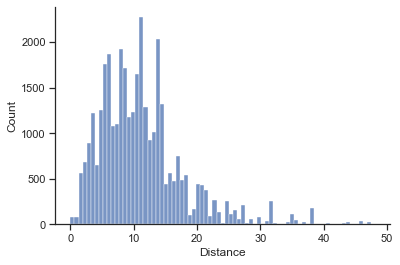

In [31]:
sns.histplot(data['Distance'], bins= 75)
sns.despine()
plt.show()


#### MinMax масштабирование

In [32]:
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(data[['Distance']])

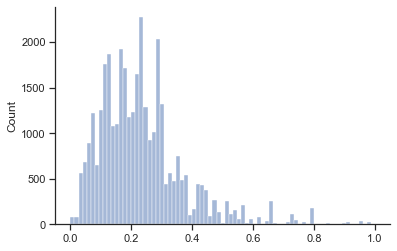

In [33]:
# Отмасштабированная гистограмма
sns.histplot(minmax_scaled_data, bins= 75, legend=False)
sns.despine()
plt.show()


#### Масштабированние на основе Z-оценки

In [34]:
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data[['Distance']])

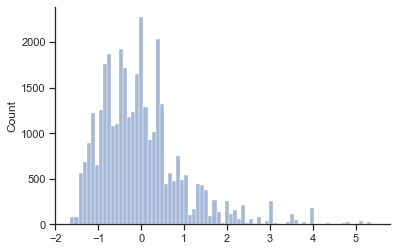

In [35]:
# Отмасштабированная гистограмма
sns.histplot(standard_scaled_data, bins= 75, legend=False)
sns.despine()
plt.show()